### 30.

In [34]:
filename = '/work/data/dic/neko.txt.mecab'

sentences = []
morphs = []
with open(filename, mode='r') as f:
    for line in f:
        if line != 'EOS\n':
            fields = line.split('\t')
            if len(fields) != 2 or fields[0] == '':
                continue
            else:
                attr = fields[1].split(',')
                morph = {'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
                morphs.append(morph)
        else:
            sentences.append(morphs)
            morphs = []
            
for morph in sentences[2]:
    print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


### 31.

In [35]:
ans = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            ans.add(morph['surface'])
print(f'動詞の表層形の種類: {len(ans)}\n')
print('---サンプル---')
for v in list(ans)[:10]:
    print(v)

動詞の表層形の種類: 3893

---サンプル---
すくい
真面目くさっ
曲がろ
隔て
遊ば
初める
おれ
行きゃ
悟れ
感ぜ


### 32.

In [36]:
ans = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            ans.add(morph['base'])
            
print(f'動詞の表層形の種類: {len(ans)}\n')
print('---サンプル---')
for v in list(ans)[:10]:
    print(v)

動詞の表層形の種類: 2300

---サンプル---
ほのめく
初める
やらす
見付ける
せしめる
洩れる
措く
遠ざかる
ほてる
膨れる


In [37]:
ans = set()
for sentence in sentences:
    for i in range(1, len(sentence) - 1):
        if sentence[i - 1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i+1]['pos']=='名詞':
            ans.add(sentence[i-1]['surface'] + sentence[i]['surface'] + sentence[i+1]['surface'])

In [38]:
print(f'「名詞+の+名詞」の種類: {len(ans)}\n')
print('---サンプル---')
for n in list(ans)[:10]:
    print(n)

「名詞+の+名詞」の種類: 4924

---サンプル---
校長の命
気の毒の至り
大根卸の中
天下の美
君の身体
垣のそば
体の名筆
杯の正宗
迷亭の機転
隅田川の底


In [39]:
ans = set()
for sentence in sentences:
    nouns = ''
    num = 0
    for morph in sentence:
        if morph['pos'] == '名詞':
            nouns = ''.join([nouns, morph['surface']])
            num += 1
        elif num >= 2:
            ans.add(nouns)
            nouns = ''
            num = 0
        else:
            nouns = ''
            num = 0
    if num >= 2: 
        ans.add(nouns)

In [40]:
print(f'連接名詞の種類: {len(ans)}\n')
print('---サンプル---')
for n in list(ans)[:10]:
    print(n)

連接名詞の種類: 4457

---サンプル---
ばかよう
寒月君博士論文
——御酒
曝ら
大分多く
排斥運動
心的変化
四寸
一八木
後架後架


In [41]:
from collections import defaultdict

In [71]:
ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans[morph['base']] += 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

In [72]:
for w in ans[:10]:
    print(w)

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


In [73]:
# !pip install japanize_matplotlib

     |████████████████████████████████| 4.1 MB 4.6 MB/s eta 0:00:01
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=5c9be90573f4638a4d3428d96dd5b624277815f0005eca1841268e024a022883
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [77]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [78]:
ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans[morph['base']] += 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

In [80]:
ans[:10]

[('の', 9194),
 ('て', 6848),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5972),
 ('と', 5508),
 ('が', 5337),
 ('た', 4267),
 ('する', 3657)]

In [82]:
keys = [a[0] for a in ans[:10]]

In [84]:
values = [a[1] for a in ans[:10]]

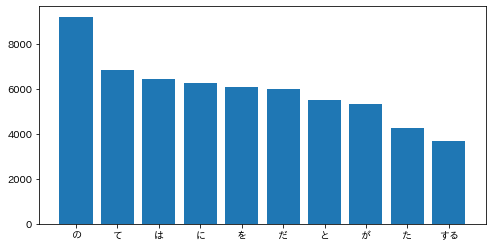

In [85]:
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

In [91]:
for i, sentence in enumerate(sentences):
    print(i+1, sentence)
    if i > 1:
        break

1 [{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}]
2 []
3 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]


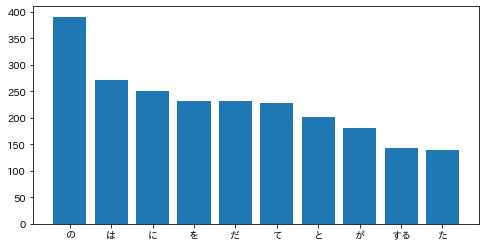

In [93]:
ans = defaultdict(int)
for sentence in sentences:
    if '猫' in [morph['surface'] for morph in sentence]:
        for morph in sentence:
            if morph['pos'] != '記号':
                ans[morph['base']] += 1
del ans['猫']
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[:10]]
values = [a[1] for a in ans[:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

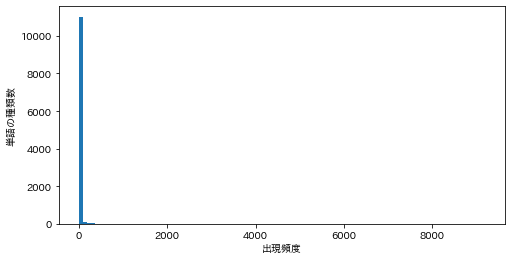

In [97]:
ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = ans.values()

plt.figure(figsize=(8, 4))
plt.hist(ans, bins=100)
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show()

In [98]:
import math

In [99]:
ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans[morph['base']] += 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

In [103]:
print(ans[:5])

[('の', 9194), ('て', 6848), ('は', 6420), ('に', 6243), ('を', 6071)]


In [104]:
ranks = [r + 1 for r in range(len(ans))]
values = [a[1] for a in ans]

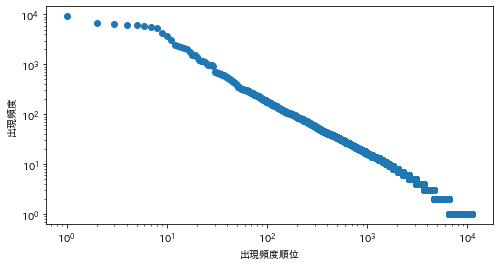

In [109]:
plt.figure(figsize=(8, 4))
plt.scatter(ranks, values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()